## Run data pipeline
Returns an aggegrated df to work with

In [1]:
# Only for Wesley %run "./Data"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Copy this cell to every new version of Main
#import dataframe
df_hourly = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated_Hourly_20240331152619.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df_hourly)}")

Number of rows in the file: 2667


In [4]:
# Toon de kolomnamen
print(df_hourly.columns)

Index(['Vdatetime', 'datetime', 'BatSOC', 'ThrottlePerc', 'RearAxle1',
       'H2Weight', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower',
       'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw',
       'DayOfWeek', 'AirTemp', 'Is_Friday', 'Is_Monday', 'Is_Saturday',
       'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'],
      dtype='object')


## Import utilities
Import custom function

In [5]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [6]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [7]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_hourly

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [9]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df_hourly['Vdatetime'].min()
max_datetime = df_hourly['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df_hourly.shape
print(df_hourly.shape)

Minimum datetime: 2022-08-01 04
Maximum datetime: 2023-04-29 16
(2667, 23)


In [10]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df_hourly.dtypes

# Display descriptive statistics for numerical columns
describe_result = df_hourly.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                              Data Types   Statistics               \
                                       0       BatSOC ThrottlePerc   
Vdatetime                         object          NaN          NaN   
datetime         datetime64[us, Etc/UTC]          NaN          NaN   
BatSOC                           float64          NaN          NaN   
ThrottlePerc                     float64          NaN          NaN   
RearAxle1                        float64          NaN          NaN   
H2Weight                         float64          NaN          NaN   
MotorRPM                         float64          NaN          NaN   
MotorTorque                      float64          NaN          NaN   
MotorTemp                        float64          NaN          NaN   
BattOutputPower                  float64          NaN          NaN   
MotorPowerDraw                   float64          NaN          NaN   
TotalFCPower                     float64          NaN          NaN   
ActualSpeed         

In [11]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df_hourly.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df_hourly.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df_hourly.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
Vdatetime           0
datetime            0
BatSOC              6
ThrottlePerc        6
RearAxle1           6
H2Weight            6
MotorRPM            6
MotorTorque         6
MotorTemp           0
BattOutputPower     6
MotorPowerDraw      6
TotalFCPower       13
ActualSpeed         6
TotalPowerDraw      6
DayOfWeek           0
AirTemp             0
Is_Friday           0
Is_Monday           0
Is_Saturday         0
Is_Sunday           0
Is_Thursday         0
Is_Tuesday          0
Is_Wednesday        0
dtype: int64

Heeft DataFrame NaN-waarden?
True

Totaal aantal NaN-waarden in DataFrame:
73


In [12]:
#Joecode to check columnnames after dropping nanas
df = df_hourly
df = df.dropna()

column_names = df.columns.tolist()

# This will print the list of column names
print(column_names)

['Vdatetime', 'datetime', 'BatSOC', 'ThrottlePerc', 'RearAxle1', 'H2Weight', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'DayOfWeek', 'AirTemp', 'Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday']


In [13]:
# Pokocode Create a boolean mask where all specified columns are zero, dropped MotorRPM 9when motor is not running) and TotalFCPower (when Fuelcell is not in use, <1 due to sensor is measurring very low watt)
mask = (df['ThrottlePerc'] == 0) & (df['ActualSpeed'] == 0) & (df['TotalPowerDraw'] == 0) & (df['MotorRPM']  == 0) & (df['TotalFCPower']  <= 1)

# Sum up the True values in the mask to get the count of rows where all conditions are met
count = mask.sum()

print(f'Number of instances where all three columns are zero: {count}')

Number of instances where all three columns are zero: 1700


In [14]:
 # Dropping rows where given conditions are met and storing the result in a new DataFrame df_filtered
conditions = (df['ThrottlePerc'] == 0) & (df['ActualSpeed'] == 0) & (df['TotalPowerDraw'] == 0) & (df['MotorRPM']  == 0) & (df['TotalFCPower']  <= 1)
count_zeros = df[conditions].shape[0]

# Print the number of rows with all four columns zero
print(f'Number of rows with all three conditions met: {count_zeros}')

df_filtered = df[~conditions]

# Print the number of remaining rows in the filtered DataFrame
print(f"Number of remaining rows in the DataFrame after filtering: {df_filtered.shape[0]}")

#switch dataframe name back to df
df =df_filtered

Number of rows with all three conditions met: 1700
Number of remaining rows in the DataFrame after filtering: 954


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#features to keep "BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "TotalPowerDraw", "AirTemp"
#"MotorPowerDraw", is dropped due to the high correlation with target 'TotalPowerDraw' 

# Verwijder niet-noodzakelijke kolommen en splits de data
X = df.drop(['Vdatetime','datetime', 'TotalPowerDraw',"MotorPowerDraw", 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y = df['TotalPowerDraw']

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [16]:
# Splits de data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 



In [17]:
X_train

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,TotalFCPower,ActualSpeed,AirTemp
708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,-0.180000,0.000000,9.8
2437,68.720833,80.347500,9637.534722,7867.389167,11.686458,154.699028,37.728321,15222.026389,-0.281230,2.045130,5.7
2032,38.513264,16.156944,1012.256944,2660.195764,9.623056,27.724306,73.216549,-9602.259792,0.356265,1.684035,7.7
170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,1.090000,0.000000,25.8
134,32.833391,36.510035,3303.687756,5375.881311,17.570873,61.150497,58.267189,-2874.732481,9240.541342,3.074903,24.9
...,...,...,...,...,...,...,...,...,...,...,...
167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,1.090000,0.000000,25.3
561,49.731162,182.692965,7024.154455,12182.185082,118.944996,332.483784,68.629315,11722.116336,20284.664452,20.815374,14.9
2357,92.235865,66.846617,7092.233083,14964.061429,25.724812,172.852632,28.571457,18302.182146,-0.245475,4.501842,9.9
1005,60.746788,222.067921,8252.399472,7830.347246,134.313980,333.343079,72.452053,31688.241284,80.350210,23.504947,12.5


In [18]:
y

0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2645     5549.933717
2648      602.394526
2650      689.177584
2659      266.421418
2661      876.396552
Name: TotalPowerDraw, Length: 954, dtype: float64

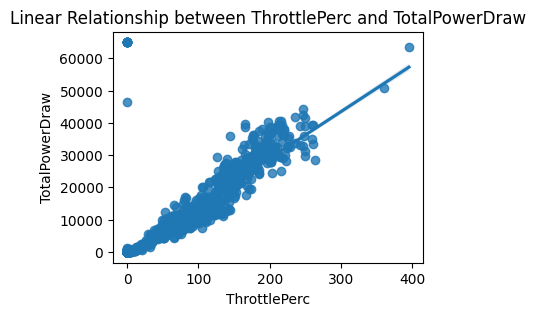

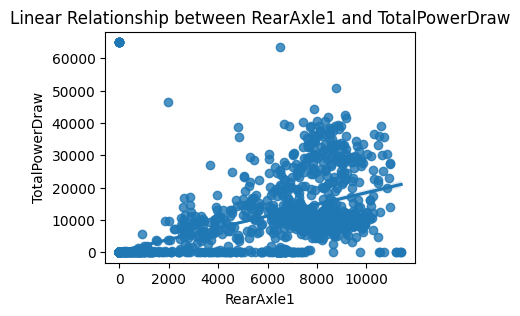

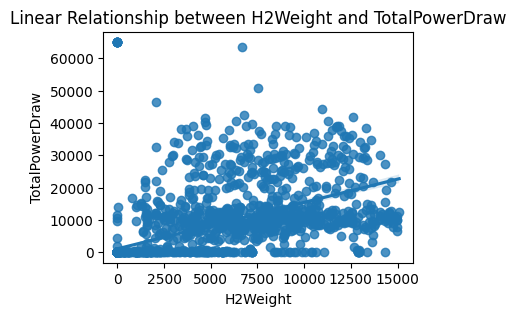

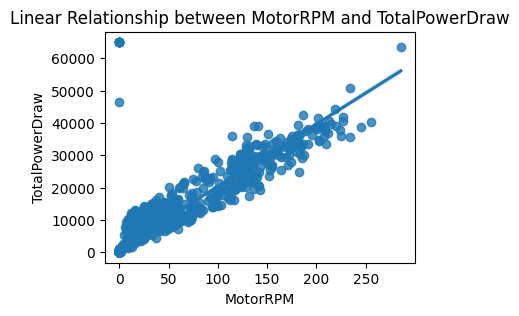

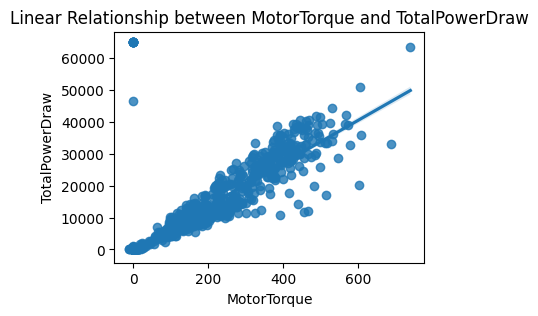

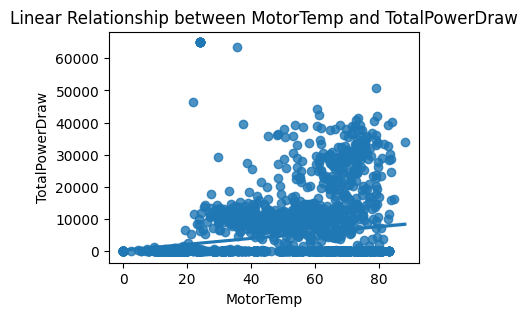

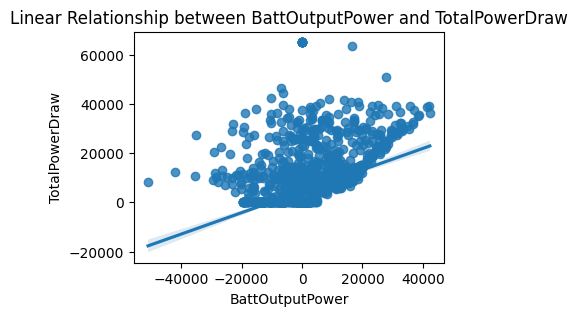

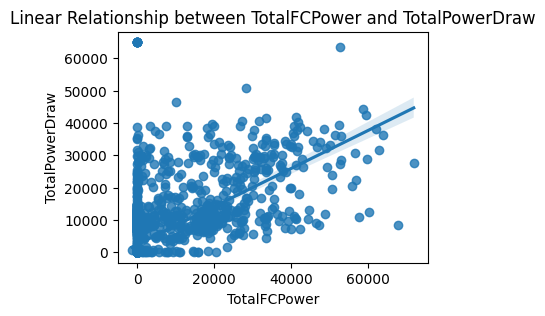

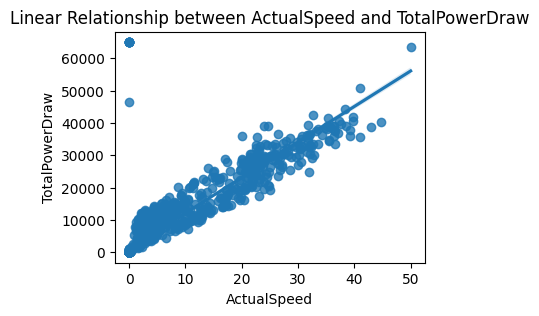

Plotting the linear relationship between Throttle Percentage and Total Power Draw...


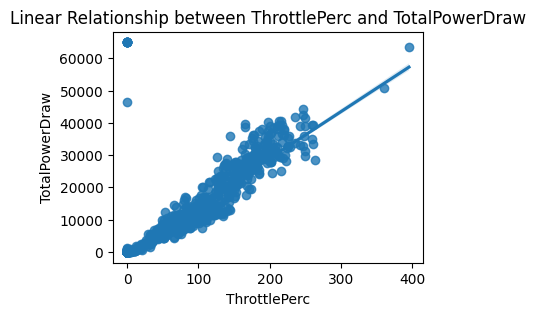

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


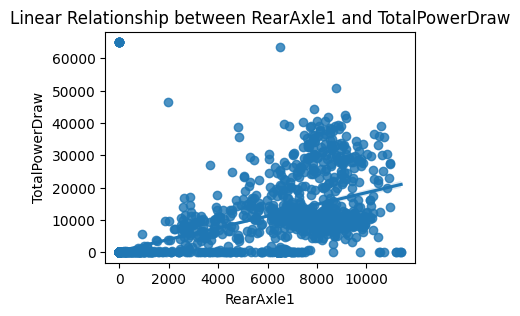

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


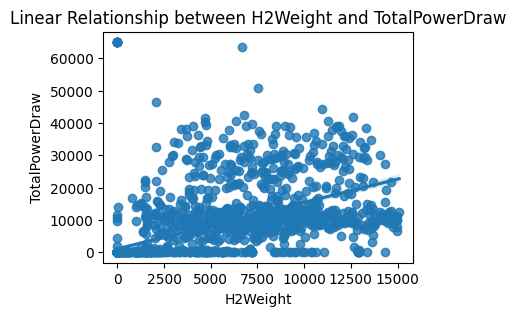

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


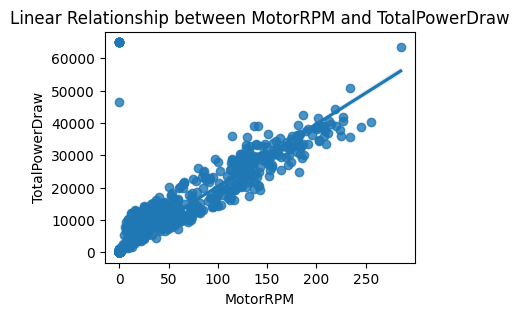

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


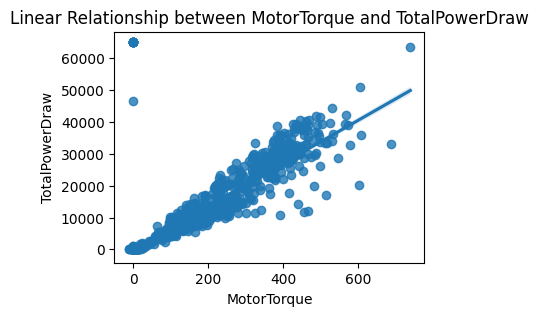

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


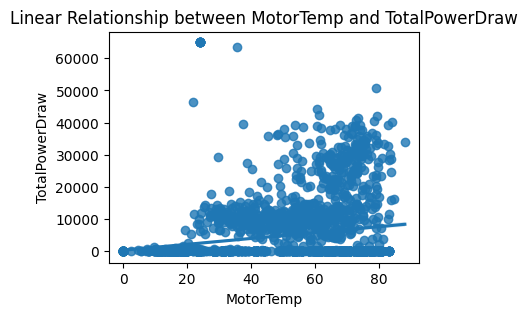

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..


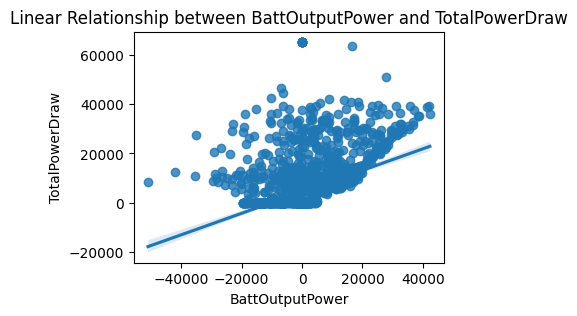

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


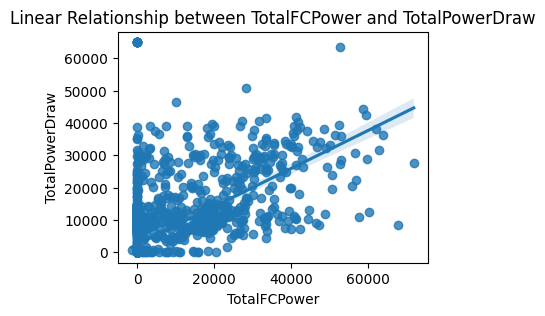

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


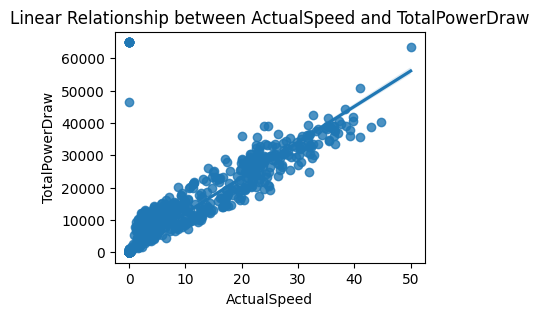

In [19]:
#check linear relationship,

def plot_linear_relationships(df, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df_hourly)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df, 'ThrottlePerc','TotalPowerDraw')
plot_linear_relationships(df, 'RearAxle1','TotalPowerDraw')
plot_linear_relationships(df, 'H2Weight','TotalPowerDraw')
plot_linear_relationships(df, 'MotorRPM','TotalPowerDraw')
plot_linear_relationships(df, 'MotorTorque','TotalPowerDraw')
plot_linear_relationships(df, 'MotorTemp','TotalPowerDraw')
plot_linear_relationships(df, 'BattOutputPower','TotalPowerDraw')
plot_linear_relationships(df, 'TotalFCPower','TotalPowerDraw')
plot_linear_relationships(df, 'ActualSpeed','TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and Total Power Draw...")
plot_linear_relationships(df, 'ThrottlePerc', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'RearAxle1', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df, 'H2Weight', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorRPM', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorTorque', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorTemp', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..")
plot_linear_relationships(df, 'BattOutputPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'TotalFCPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'ActualSpeed', 'TotalPowerDraw')


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming X_train and y_train are defined and aligned

# Make an instance of StandardScaler
scaler = StandardScaler()

# Scale the independent variables (X)
X_scaled = scaler.fit_transform(X_train)

# Add a constant for the intercept
X_scaled_with_const = sm.add_constant(X_scaled)

# Apply the OLS model
model = sm.OLS(y_train, X_scaled_with_const).fit()  # Use y_train to match X_train

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalPowerDraw   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 08 May 2024   Prob (F-statistic):          5.53e-199
Time:                        11:37:38   Log-Likelihood:                -7733.2
No. Observations:                 763   AIC:                         1.549e+04
Df Residuals:                     752   BIC:                         1.554e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.271e+04    222.496     57.137      0.0

In [21]:
# Get the feature names from the original DataFrame
feature_names = X_train.columns.tolist()

# Since 'sm.add_constant' adds a constant at the beginning, add 'const' to the feature names list
feature_names_with_const = ['const'] + feature_names

# Convert the numpy array back to a pandas DataFrame and add the column names
X_scaled_with_const_df = pd.DataFrame(X_scaled_with_const, columns=feature_names_with_const)

# Now X_scaled_with_const_df is a DataFrame with headers
print(X_scaled_with_const_df.head())
#To compare the scaled set with the unscaled set X_train , order the lines in the same order
X_scaled_with_const_df = X_scaled_with_const_df.set_index(X_train.index)
X_scaled_with_const_df
#To compare the scaled set with the unscaled set X_train , order the lines in the same order
X_scaled_with_const_df = X_scaled_with_const_df.set_index(X_train.index)
X_scaled_with_const_df

   const    BatSOC  ThrottlePerc  RearAxle1  H2Weight  MotorRPM  MotorTorque  \
0    1.0 -2.046224     -1.376929  -2.098340 -1.661581 -0.879858    -1.307354   
1    1.0  0.578285     -0.116515   1.112572  0.278896 -0.676037    -0.203820   
2    1.0 -0.575368     -1.123474  -1.761089 -1.005449 -0.712024    -1.109585   
3    1.0 -2.046224     -1.376929  -2.098340 -1.661581 -0.879858    -1.307354   
4    1.0 -0.792288     -0.804195  -0.997659 -0.335630 -0.573408    -0.871142   

   MotorTemp  BattOutputPower  TotalFCPower  ActualSpeed   AirTemp  
0  -1.468709        -0.418352     -0.736377    -0.879858 -0.332466  
1  -0.743985         0.809824     -0.736384    -0.676037 -0.876029  
2   1.129452        -1.193101     -0.736340    -0.712024 -0.610876  
3   0.537326        -0.418352     -0.736288    -0.879858  1.788756  
4   0.340270        -0.650297     -0.091016    -0.573408  1.669437  


,const,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,TotalFCPower,ActualSpeed,AirTemp
708,1.0,-2.046224,-1.376929,-2.098340,-1.661581,-0.879858,-1.307354,-1.468709,-0.418352,-0.736377,-0.879858,-0.332466
2437,1.0,0.578285,-0.116515,1.112572,0.278896,-0.676037,-0.203820,-0.743985,0.809824,-0.736384,-0.676037,-0.876029
2032,1.0,-0.575368,-1.123474,-1.761089,-1.005449,-0.712024,-1.109585,1.129452,-1.193101,-0.736340,-0.712024,-0.610876
170,1.0,-2.046224,-1.376929,-2.098340,-1.661581,-0.879858,-1.307354,0.537326,-0.418352,-0.736288,-0.879858,1.788756
134,1.0,-0.792288,-0.804195,-0.997659,-0.335630,-0.573408,-0.871142,0.340270,-0.650297,-0.091016,-0.573408,1.669437
...,...,...,...,...,...,...,...,...,...,...,...,...
167,1.0,-2.046224,-1.376929,-2.098340,-1.661581,-0.879858,-1.307354,0.537326,-0.418352,-0.736288,-0.879858,1.722467
561,1.0,-0.146947,1.488980,0.241879,1.343132,1.194635,1.064394,0.887290,0.527437,0.680292,1.194635,0.343673
2357,1.0,1.476345,-0.328304,0.264561,2.029276,-0.431197,-0.074323,-1.227380,1.058343,-0.736382,-0.431197,-0.319208
1005,1.0,0.273749,2.106656,0.651090,0.269759,1.462682,1.070523,1.089094,2.138385,-0.730753,1.462682,0.025490


In [22]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_scaled.shape)
print(type(X_scaled))
print(y.shape)
print(type(y))

(763, 11)
<class 'numpy.ndarray'>
(954,)
<class 'pandas.core.series.Series'>


In [23]:
#Check that X_scaled is scaled 
print(X_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[-2.04622388 -1.37692862 -2.09834032 ... -0.73637718 -0.87985751
  -0.33246604]
 [ 0.57828519 -0.11651547  1.11257217 ... -0.73638425 -0.67603664
  -0.87602907]
 [-0.57536846 -1.12347425 -1.76108929 ... -0.73633973 -0.71202398
  -0.61087637]
 ...
 [ 1.47634492 -0.32830415  0.26456062 ... -0.73638175 -0.4311969
  -0.3192084 ]
 [ 0.27374939  2.10665616  0.65109025 ... -0.73075305  1.46268215
   0.02549011]
 [-2.04622388 -1.37692862 -2.09834032 ... -0.73628848 -0.87985751
   1.72246737]]
0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2645     5549.933717
2648      602.394526
2650      689.177584
2659      266.421418
2661      876.396552
Name: TotalPowerDraw, Length: 954, dtype: float64


END OF PREPROCESSING    

In [40]:
#check which format the dataset is
print(type(X_scaled))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [25]:
#check which format the dataset is
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [26]:
# train a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print the feature names alongside their coefficients
print(feature_coefficients)

Mean Squared Error (MSE): 52146167.80720389
Coefficient of Determination (R^2): 0.6865738500871847
            Feature  Coefficient
0            BatSOC   -19.734591
1      ThrottlePerc    34.698595
2         RearAxle1    -0.559816
3          H2Weight    -0.110649
4          MotorRPM    52.227976
5       MotorTorque    17.397146
6         MotorTemp   -51.072033
7   BattOutputPower     0.337684
8      TotalFCPower     0.318761
9       ActualSpeed     9.139896
10          AirTemp    43.143574


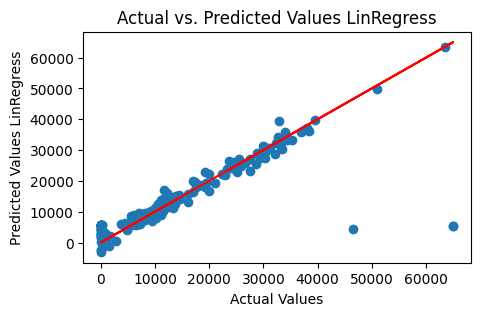

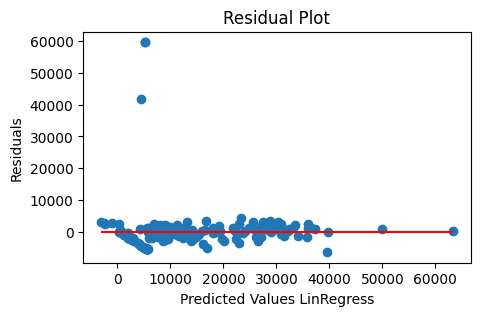

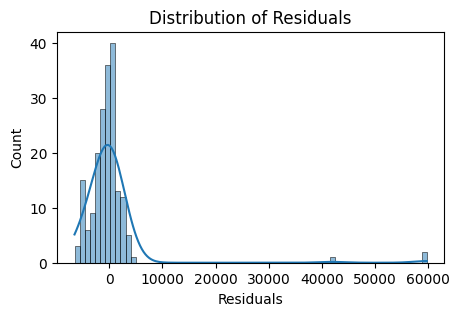

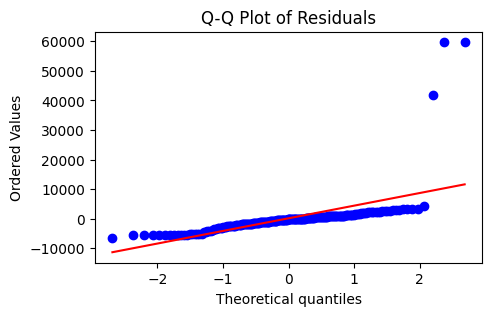

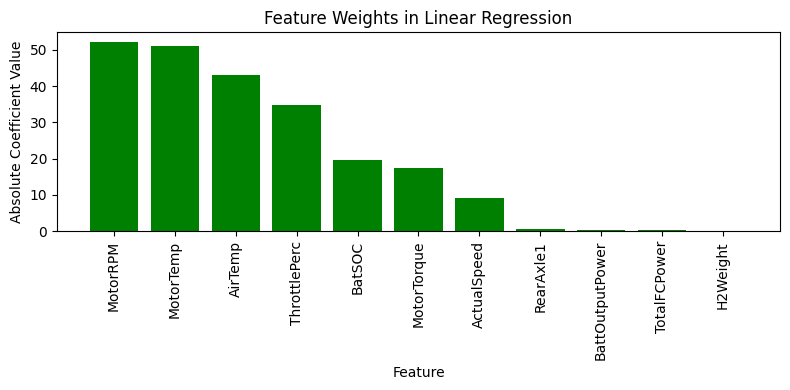

In [27]:
# residuals, predict vs actuals, qq plots for LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting values for the testing set
y_pred = model.predict(X_test)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress')
plt.show()

# Calculating residuals
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()



In [28]:
#Run the model on a selection of the data


def predict_total_power_draw(df, model):
    """
    Applies a trained Linear Regression model to predict 'TotalPowerDraw' on a new dataset.

    Parameters:
 df_hourly_numeric (DataFrame or ndarray): The original dataset containing the independent variables.
    model (LinearRegression): The trained Linear Regression model.

    Returns:
    ndarray: Predicted values for 'TotalPowerDraw'.
    """

    # Check if orig_data is a DataFrame or ndarray and select features accordingly
    if isinstance(df, pd.DataFrame):
        # If orig_data is a DataFrame, ensure it contains the same features as X_train
        features = df[X_train.columns] if 'X_train' in globals() or 'X_train' in locals() else df
    elif isinstance(df, np.ndarray):
        # If orig_data is an ndarray, assume it's already structured correctly
        features = df
    else:
        raise ValueError("orig_data must be a pandas DataFrame or a numpy ndarray.")

    # Use the model to make predictions on the provided features
    predictions = model.predict(features)

    return predictions

# Example usage:
# predictions = predict_total_power_draw(orig_data, model)


APPLY THE MODEL ON THE ORIGINAL DATASET

In [29]:
#Apply the LinRegress model on the original data 

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


In [30]:
selected_columns_TPD = df_with_predictions[['datetime', 'TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [31]:
selected_columns_TPD

,datetime,TotalPowerDraw,Predicted_TotalPowerDraw
0,2022-08-01 04:59:59.880000+00:00,13713.046695,13705.204253
1,2022-08-01 05:59:59.990000+00:00,9444.155245,7625.714777
2,2022-08-01 06:59:59.870000+00:00,12075.898738,13089.769988
3,2022-08-01 07:59:59.820000+00:00,40680.984837,38500.479527
4,2022-08-01 08:59:59.940000+00:00,5412.054734,7785.319689
...,...,...,...
2645,2023-04-28 08:59:59.860000+00:00,5549.933717,8638.628029
2648,2023-04-28 11:59:59.780000+00:00,602.394526,2289.620475
2650,2023-04-28 13:59:59.770000+00:00,689.177584,2984.240945
2659,2023-04-29 09:59:59.960000+00:00,266.421418,5733.660581


RANDOMFOREST

In [32]:
#find the best hyperparamters for 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500]  # You can adjust this list based on your computational budget
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best number of trees
print("Best number of trees (n_estimators):", best_rf.n_estimators)

# Optionally, evaluate its performance on the test set
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test MSE for the best model:", mse)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=50; total time=   1.4s
[CV] END ....................................n_estimators=50; total time=   1.4s
[CV] END ....................................n_estimators=50; total time=   1.4s
[CV] END ....................................n_estimators=50; total time=   1.3s
[CV] END ....................................n_estimators=50; total time=   1.4s
[CV] END ...................................n_estimators=100; total time=   2.6s
[CV] END ...................................n_est

In [33]:
#Run RandomForestRegressor with Best number of trees (n_estimators): 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Create the RandomForestRegressor object
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_train_pred = random_forest_regressor.predict(X_train)
y_test_pred = random_forest_regressor.predict(X_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")

# Feature Importance
feature_importances = random_forest_regressor.feature_importances_
# Assuming you want to print feature importance
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.3f}")

Training MSE: 546864.009
Test MSE: 31399997.937
Training R^2: 0.996
Test R^2: 0.811
Feature Importances:
Feature 0: 0.004
Feature 1: 0.299
Feature 2: 0.004
Feature 3: 0.006
Feature 4: 0.164
Feature 5: 0.118
Feature 6: 0.067
Feature 7: 0.002
Feature 8: 0.173
Feature 9: 0.163
Feature 10: 0.002


RF Training MSE: 546864.009
RF Test MSE: 31399997.937
RF Training R^2: 0.996
RF Test R^2: 0.811


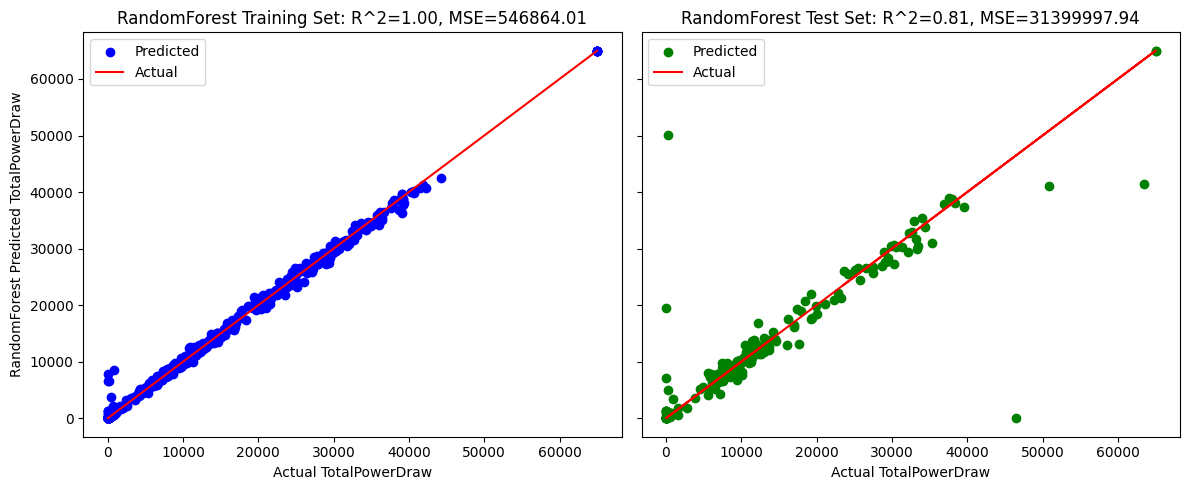

<Figure size 1000x600 with 0 Axes>

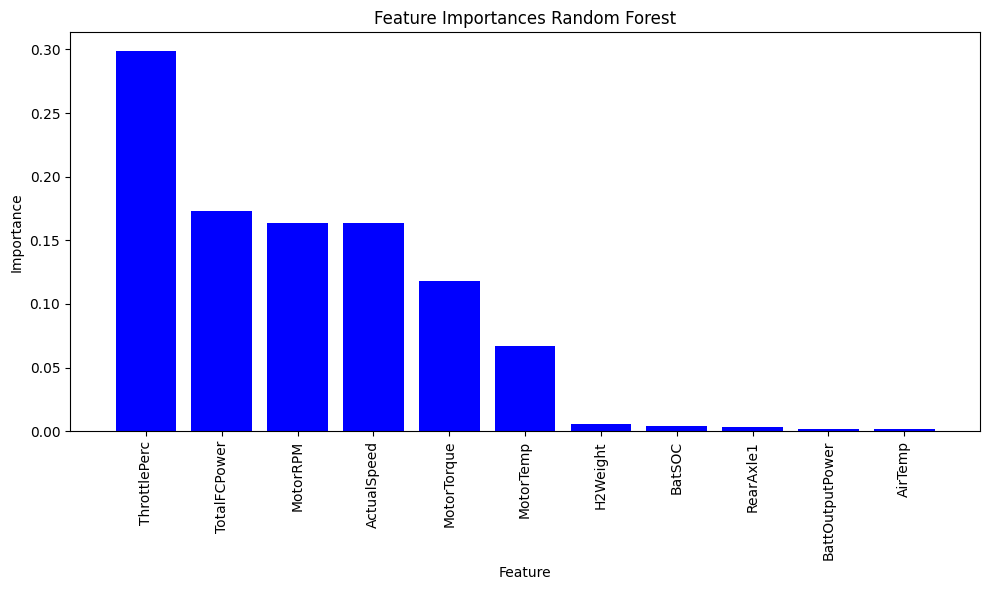

In [34]:
#Random Forest for Regressions

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# defined y_train, y_train_pred, y_test, and y_test_pred from your model's predictions

# Calculate the performance metrics for the training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Calculate and print performance metrics
print(f"RF Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RF Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RF Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"RF Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
ax[0].plot(y_train, y_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual TotalPowerDraw')
ax[0].set_ylabel('RandomForest Predicted TotalPowerDraw')
ax[0].legend()

# Test set plot
ax[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
ax[1].plot(y_test, y_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual TotalPowerDraw')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# Get the feature names in the order of importance
sorted_feature_names = np.array(X_train.columns)[indices]

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Then, retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Now, let's plot the feature importances in descending order
plt.figure(figsize=(10, 6))
plt.title('Feature Importances Random Forest')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()


In [35]:
#Apply the Random forest model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions

y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

In [36]:
selected_columns_TPD = df_with_predictions[['datetime', 'TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [37]:
# run the Random Forest Regressor on actual data and show the difference between actual and predicted
import pandas as pd

# Assuming 'df', 'model', 'X_train', and 'random_forest_regressor' are already defined

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# Merge the predictions back into the original DataFrame
df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions['Percentage_Difference'] = (abs(df_with_predictions['TotalPowerDraw'] - df_with_predictions['Predicted_TotalPowerDraw']) / df_with_predictions['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions['Percentage_Difference'] = df_with_predictions['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with Random Forest')
print(df_with_predictions[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])

Predictions with Random Forest
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13235.850024               3.479873
1        9444.155245               8829.045440               6.513127
2       12075.898738              12238.030472               1.342606
3       40680.984837              39836.036324               2.077011
4        5412.054734               5263.085936               2.752537
...              ...                       ...                    ...
2645     5549.933717               4165.879798              24.938206
2648      602.394526                653.762508               8.527299
2650      689.177584                905.197192              31.344549
2659      266.421418                243.366256               8.653644
2661      876.396552                965.752973              10.195889

[954 rows x 3 columns]


GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  
GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 629954.325
Test MSE: 18560802.843
Training R^2: 0.995
Test R^2: 0.888


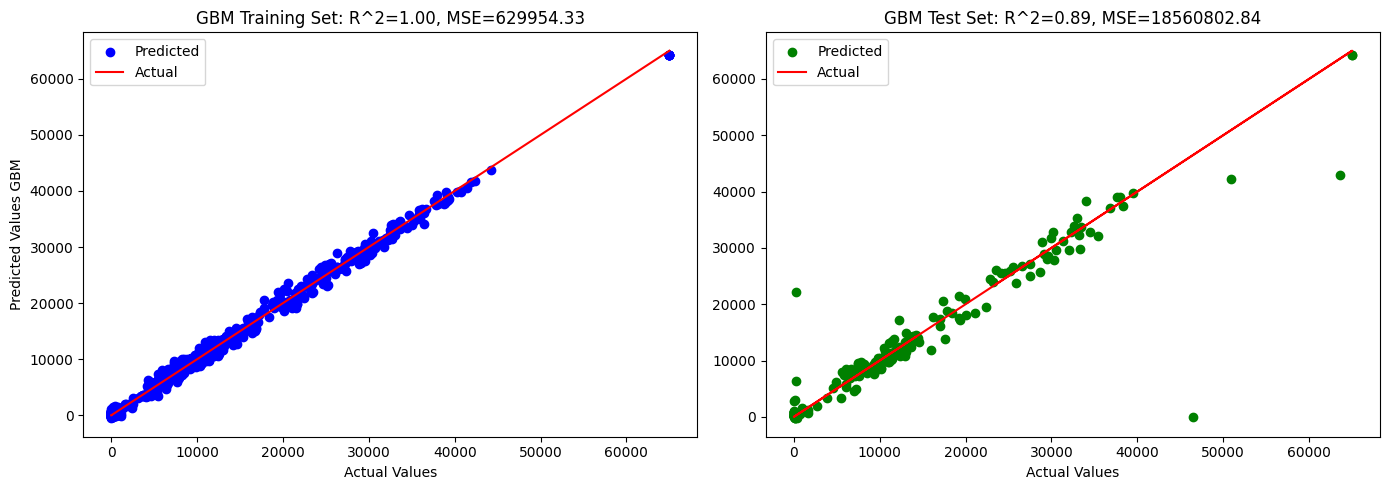

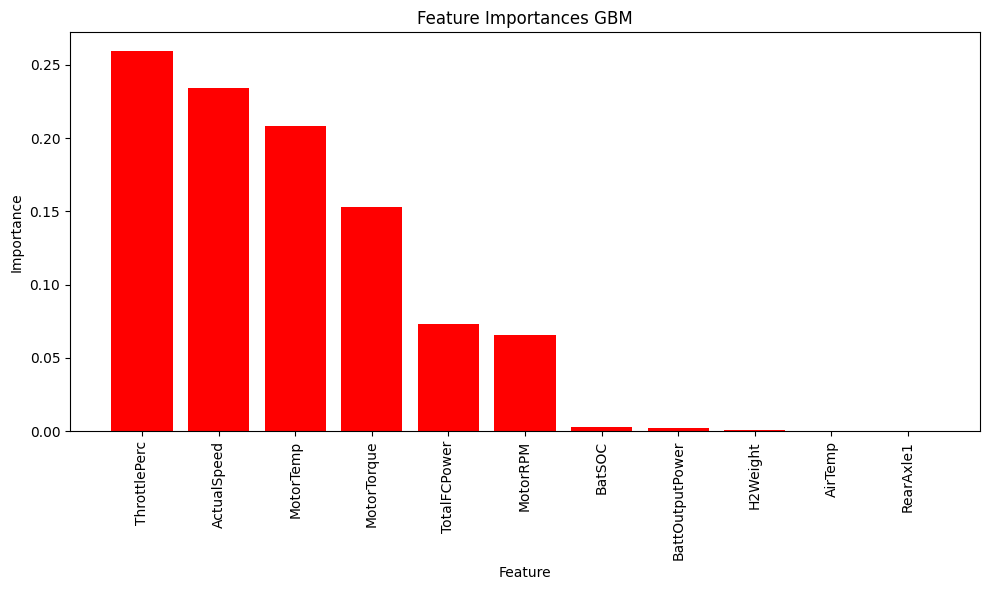

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_gbm = gbm_regressor.predict(X_train)
y_test_pred_gbm = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
train_mse_gbm = mean_squared_error(y_train, y_train_pred_gbm)
test_mse_gbm = mean_squared_error(y_test, y_test_pred_gbm)
train_r2_gbm = r2_score(y_train, y_train_pred_gbm)
test_r2_gbm = r2_score(y_test, y_test_pred_gbm)

print(f"Training MSE: {train_mse_gbm:.3f}")
print(f"Test MSE: {test_mse_gbm:.3f}")
print(f"Training R^2: {train_r2_gbm:.3f}")
print(f"Test R^2: {test_r2_gbm:.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred_gbm, color='blue', label='Predicted')
axes[0].plot(y_train, y_train, color='red', label='Actual')  # Ideal line where predicted values equal actual values
axes[0].set_title(f'GBM Training Set: R^2={train_r2_gbm:.2f}, MSE={train_mse_gbm:.2f}')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values GBM')
axes[0].legend()

axes[1].scatter(y_test, y_test_pred_gbm, color='green', label='Predicted')
axes[1].plot(y_test, y_test, color='red', label='Actual')
axes[1].set_title(f'GBM Test Set: R^2={test_r2_gbm:.2f}, MSE={test_mse_gbm:.2f}')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

plt.tight_layout()
plt.show()

# Extracting feature importances
feature_importances_gbm = gbm_regressor.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances_gbm)[::-1]

# Retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances GBM')
plt.bar(range(X_train.shape[1]), feature_importances_gbm[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [39]:
#Apply the GBM model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new_gbm = df[feature_names]

# Drop the nans
X_new_cleaned_gbm = X_new_gbm.dropna()

# Making predictions

y_new_pred_gbm = gbm_regressor.predict(X_new_cleaned_gbm)

# Insert predictions into the cleaned DataFrame
X_new_cleaned_gbm['Predicted_TotalPowerDraw'] = y_new_pred_gbm

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions_gbm = df.merge(X_new_cleaned_gbm[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions_gbm['Percentage_Difference'] = (abs(df_with_predictions_gbm['TotalPowerDraw'] - df_with_predictions_gbm['Predicted_TotalPowerDraw']) / df_with_predictions_gbm['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions_gbm['Percentage_Difference'] = df_with_predictions_gbm['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with GBM')
print(df_with_predictions_gbm[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])



Predictions with GBM
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13103.516211               4.444895
1        9444.155245               8630.468432               8.615771
2       12075.898738              12377.403153               2.496745
3       40680.984837              39793.925820               2.180525
4        5412.054734               5193.992592               4.029193
...              ...                       ...                    ...
2645     5549.933717               3413.326357              38.497890
2648      602.394526                522.301471              13.295781
2650      689.177584                586.588659              14.885703
2659      266.421418               -204.458799             176.742629
2661      876.396552                137.608524              84.298372

[954 rows x 3 columns]
